<h1> <center> Data Mining, Machine Learning and Deep Learning <br> 
 Mandatory Assignment 1 
</center> </h1> 

Group Members:
> **Mark Bjerregaard** <br>
> **Brynjar Orri Brim** <br>
> **Thor Møldrup**

<h2> Question 1: ML Assignment </h2>
<h3> Pt 1: Download Forest Fires dataset </h3>

In [2]:
#Set the mood 
import pandas as pd
import urllib
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Import the party (in a fresh panda suit)
df = pd.read_csv('https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFires.csv')
display(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<h2> Pt 1.1: EDA (Exploratory data analysis)</h2>
<h3> Process: </h3>
1. Get data description <br>
2. Explore data, identify types, locate missing values <br>

In [4]:
#Download guest names to dictionary and filter out unnecessary information using regex 
url = "https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFiresColumns.txt"
file = urllib. request. urlopen(url)
expl_text = []

#iterate list of txt rows
for line in file: 
    decoded_line = line.decode("utf-8")
    expl_text.append(decoded_line)


#use regex to populate dictionary, using collon as seperator
expl_dict = {}
for line in expl_text[4:]:
    
    try:
        key, val = re.search("(^\w+)\:\s(.*)",line).group(1, 2)
    except:
        continue
    expl_dict[key]  = val

print("columns and explantions")
for key in expl_dict:
    print( key,":", expl_dict[key])

columns and explantions
X : x-axis spatial coordinate within the Montesinho park map: 1 to 9
Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9
month : month of the year: "jan" to "dec" 
day : day of the week: "mon" to "sun"
FFMC : FFMC index from the FWI system: 18.7 to 96.20
DMC : DMC index from the FWI system: 1.1 to 291.3 
DC : DC index from the FWI system: 7.9 to 860.6 
ISI : ISI index from the FWI system: 0.0 to 56.10
temp : temperature in Celsius degrees: 2.2 to 33.30
RH : relative humidity in %: 15.0 to 100
wind : wind speed in km/h: 0.40 to 9.40 
rain : outside rain in mm/m2 : 0.0 to 6.4 
area : the burned area of the forest (in ha): 0.00 to 1090.84 


We now have an overview of what the columns signify, as well as data ranges. <br>
A quick search reveals the FIWI codes are indexes derived from imformation such as temperature, humidity, rain etc. <br>
Now lets look at types, non-null counts and a summary of the data

In [5]:
#Exploring pandas dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


We can now see the dataset contains
- 13 columns
- 517 rows
- 0 null values <br> <br>
From the above tables we can gather that: <br><br>
- Month and Day columns are of the object type (a handy pandas datatype that can contain many different contents beside strings). We will modify these to integers for analysis purposes <br>
- The data seems unequally distributed which we will sort out later as part of the data cleaning before we start to cluster

<h2> Pt 1.2: Analysis - clustering</h2>
<h3> Process: </h3>
1. Data cleaning <br>
> Remove X, Y axis as we are not including geolocation in analysis <br>
> Convert months and days to integers <br>
2. Initial analysis <br>
> look for correlations and interresting relationships 

In [6]:
#Dropping X, Y columns
plot_col_drop = ['X','Y']
clean_df = df.drop(plot_col_drop,axis=1)

#Convert months and daysto integers 
months = {'month':{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}
days = {'day':{"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}}
clean_df.replace(months,inplace = True)
clean_df.replace(days,inplace = True)

Having cleaned the data we can now start exploring <br>
To look for relationships we arrange the features in a pairplot

In [7]:
#pairplot
sns.pairplot(clean_df)

From the above plot it seems we can indentify quite a lot of related features in our dataset <br>
To move forward we decide: <br>
- Focus on analysing conditions affecting the likelihood and area of fires
- Avoid including related fields (such as DC/DMC)
- Disregard obvious relationships such as forest fires and seasonality

From the pairplot we see interresting clusters in the relationships between:
- DC
- RH
- temp
- wind 

Lets examine them closer

In [8]:
interesting_cols = ['DC','RH','temp','wind','area']
new_df = clean_df[interesting_cols]

sns.pairplot(new_df)


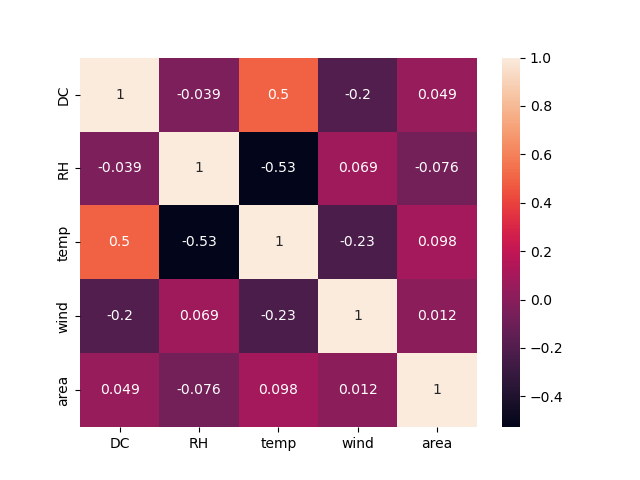

In [9]:
#Correlation
plt.figure()
sns.heatmap(new_df.corr(), annot=True)
plt.show()



We indeed see some interresting relationships and nice clusters. Other insights are: 
- Area seems to have extreme outliers
- DC is skewed to the left 
- RH has a long tail distribution

Doing a bit of research we find
- DC (Drought code) is moisture in deep organic layers, an indicator of long periods of hot weather with no rain for a significant period. This seems promising
- RH (Relative Humidity) is the humidity relative to temperature, also promising as it is a good indication for current conditions

Combining these two features (DC & RH) we should get a good picture of both current and prior conditions that might indicate **higher likelihood of forrest fires and their size** <br>
We choose not to focus on temperature as this indicator is a bit too obvious as an indicator of forrest fires, as well as DC being derived from temperature, hence the .5 correlation <br> <br>

Having chosen our columns we can now start building our pipeline and choosing our model. For this we create a pipeline to
- Transform area with log + 1 with a custom transformer (+ 1 so 0 values will remain 0)
- Scale with MinMax scale

In [10]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Select columns
cols = ['RH', 'DC', 'area']

#assign chosen columns to X 
X = new_df.loc[:,cols]

#custom log1p Transformer
class Log1pTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        Xlog = np.log(X + 1).to_numpy() 
        return Xlog

#Assign custom transformer to column transformer
area_transform = ColumnTransformer(
                transformers=[('log1p', Log1pTransformer(), ['area'])], remainder='passthrough')


#Pipeline with Standardscaler
pipe = Pipeline(steps=[
        ('log1p',area_transform),
        ('scaler',StandardScaler())
        ])
X_scaled_StdSc = pipe.fit_transform(X)

X_scaled_StdSc = pd.DataFrame(X_scaled_StdSc, columns = cols[::-1])
display(X_scaled_StdSc)


,area,DC,RH
0,-0.795247,0.411724,-1.830477
1,-0.795247,-0.692456,0.488891
2,-0.795247,-0.692456,0.560715
3,-0.795247,3.233519,-1.898266
4,-0.795247,3.356206,-1.798600
...,...,...,...
512,0.641225,-0.753800,0.474768
513,2.076875,1.638592,0.474768
514,0.992873,1.577248,0.474768
515,-0.795247,-0.140366,0.269382


Having cleaned the data we can now use kmeans to categorize our data <br>
Note we use kmeans instead of DBSCAN as our data seems to have quite a lot of overlap which DBSCAN does not handle as well as kmean <br>

From experimentation we can find the configuration of n-clusters to see what fits our model the best

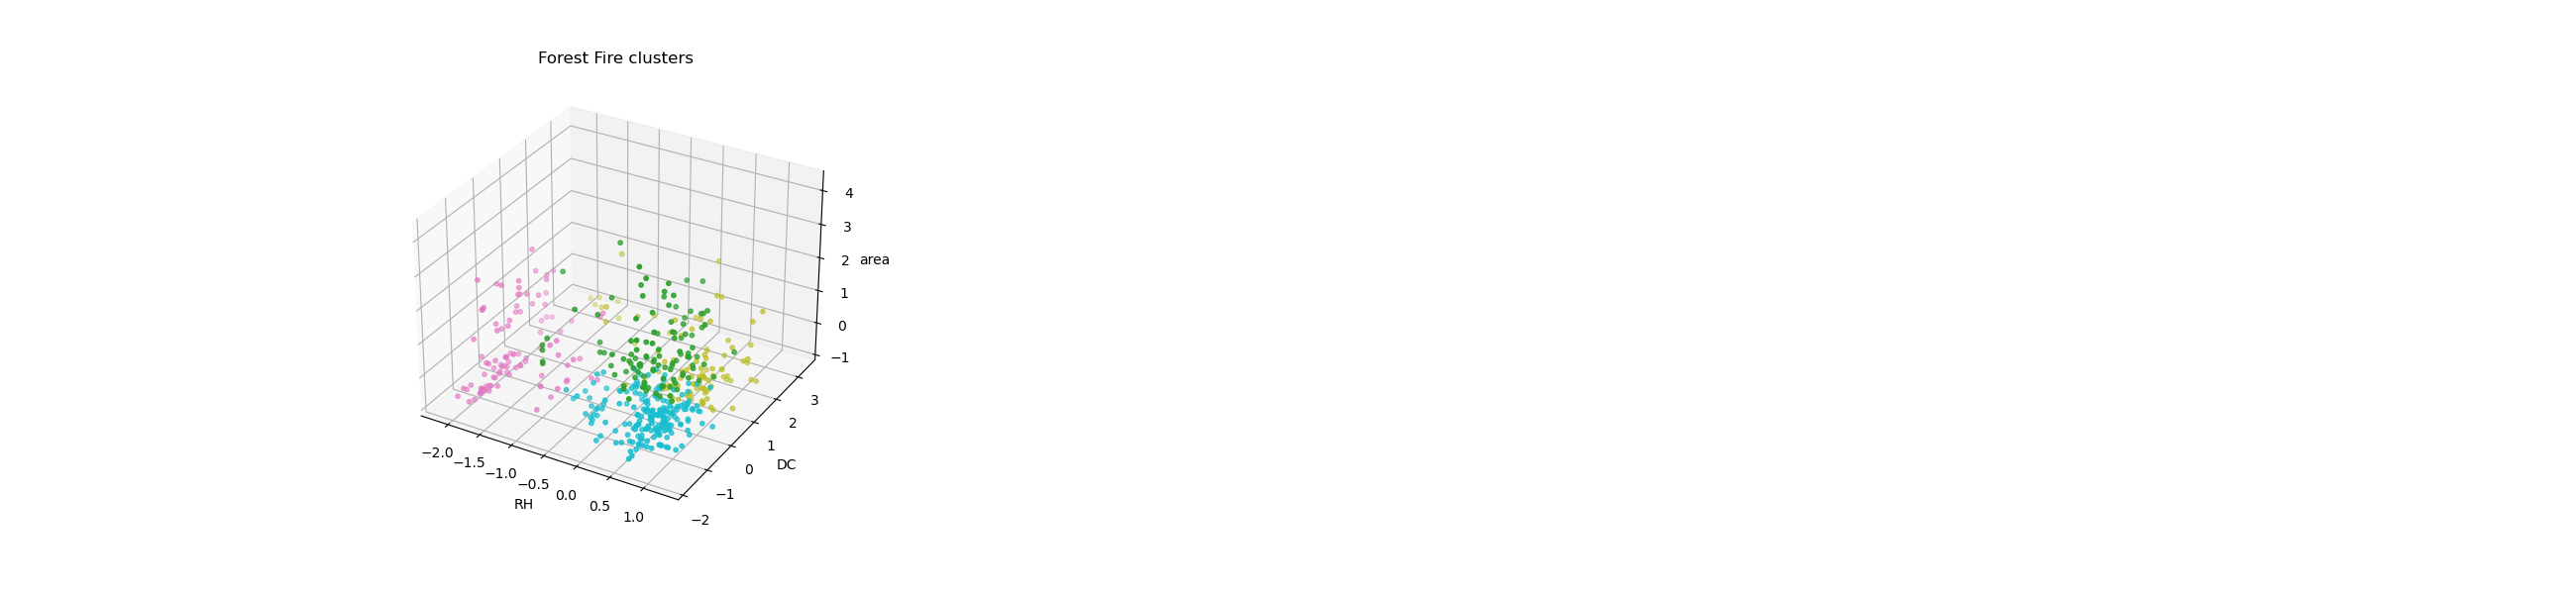

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import ipympl

X_scaled = X_scaled_StdSc.copy()

#Defining our model
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=800,
    random_state=0)

#Assigning colors for our 3D plot
colors = ['tab:cyan', 'tab:olive', 'tab:green', 'tab:pink', 'tab:brown', 'tab:purple', 'tab:red', 'tab:green']

#predicting categories and plotting 3D model
X_scaled['cluster'] = kmeans.fit_predict(X_scaled)
X_scaled['c'] = X_scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_scaled.RH, X_scaled.DC, X_scaled.area, c = X_scaled.c, s=10)
ax.set_xlabel('RH')
ax.set_ylabel('DC')
ax.set_zlabel('area')
ax.set_title("Forest Fire clusters")
plt.show()

From the graph we see that clusters:
- big fires seem to converge around 0.5 RH and -1 Drought Code
- Fires seems to be frequent around -2 RH
- Size of fires seem to be determined by low Drought Code (indicating low moisture content in deep organic layers) 